In [1]:
import pandas as pd
import numpy as np
import fs_qe as fq

%matplotlib inline

# 1 merging and data processing

## 1.1 merging

In [2]:
df1 = fq.import_data2(file='data_all/us_noe_all1.csv')
df2 = fq.import_data2(file='data_all/us_noe_all2.csv')
df3 = fq.import_data2(file='data_all/us_noe_all3.csv')
df4 = fq.import_data2(file='data_all/us_noe_all4.csv')
df5 = fq.import_data2(file='data_all/us_noe_all5.csv')

df6 = fq.import_data2(file='data_all/us_noe_all6.csv')
df7 = fq.import_data2(file='data_all/us_noe_all7.csv')
df8 = fq.import_data2(file='data_all/us_noe_all8.csv')
df9 = fq.import_data2(file='data_all/us_noe_all9.csv')
df10 = fq.import_data2(file='data_all/us_noe_all10.csv')

df11 = fq.import_data2(file='data_all/us_noe_all11.csv')
df12 = fq.import_data2(file='data_all/us_noe_all12.csv')
df13 = fq.import_data2(file='data_all/us_noe_all13.csv')
df14 = fq.import_data2(file='data_all/us_noe_all14.csv')

Then combine them.

In [3]:
df_x1 = df1.append(df2, ignore_index=True)
df_x2 = df_x1.append(df3, ignore_index=True)
df_x3 = df_x2.append(df4, ignore_index=True)
df_x4 = df_x3.append(df5, ignore_index=True)
df_x5 = df_x4.append(df6, ignore_index=True)
df_x6 = df_x5.append(df7, ignore_index=True)
df_x7 = df_x6.append(df8, ignore_index=True)
df_x8 = df_x7.append(df9, ignore_index=True)
df_x9 = df_x8.append(df10, ignore_index=True)
df_x10 = df_x9.append(df11, ignore_index=True)
df_x11 = df_x10.append(df12, ignore_index=True)
df_x12 = df_x11.append(df13, ignore_index=True)
df_us = df_x12.append(df14, ignore_index=True)

df_us

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2200000.00,2200000.00,2200000.00,2200000.00,2300000.00,2300000.00,2300000.00,2200000.00,2200000.00,n.a.
1,56200.00,88400.00,117300.00,154100.00,230800.00,341400.00,566000.00,647500.00,798000.00,n.a.
2,60400.00,72800.00,80300.00,92600.00,110000.00,116000.00,123000.00,132000.00,137000.00,n.a.
3,280000.00,280000.00,208000.00,217800.00,243000.00,250000.00,332000.00,295000.00,290000.00,n.a.
4,82100.00,76900.00,75000.00,75300.00,73500.00,71100.00,69600.00,71000.00,74900.00,n.a.
...,...,...,...,...,...,...,...,...,...,...
1259641,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,1.00
1259642,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,1.00,1.00
1259643,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,1.00
1259644,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,1.00


## 1.2 data processing

In [4]:
df_us5 = fq.preprocess_data(df_us, var1='noe', var2='lognoe')

/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [5]:
df_us6 = df_us5[df_us5['fgrow_log'] != 0.0]
df_us7 = df_us6[df_us6['fgrow_log'] != np.inf]
df_us8 = df_us7[df_us7['fgrow_log'] != - np.inf]
df_us9 = df_us8[df_us8['noe'] != 0.0]
df_us10 = df_us9[df_us9['lognoe'] > 0.0]
df_us10.to_csv('data_all/us_noe_all_postprocess.csv')

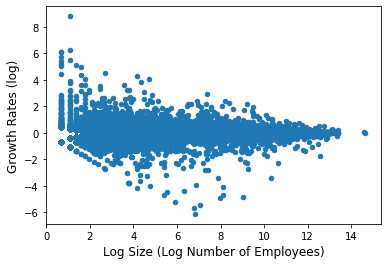

In [6]:
fq.scatterplot(df_us10, x='lognoe', xlabel='Log Size (Log Number of Employees)')